### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

### 2. Read the dataset

In [2]:
file_path = r"D:\Data Science\Machine Learning\Flight Price Prediction using AWS Sagemaker\Datasets\train.csv"
train = pd.read_csv(file_path)

In [3]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-21,Delhi,Cochin,05:35:00,08:50:00,195,0.0,No Info,5601
1,Jet Airways,2019-05-21,Kolkata,Banglore,14:05:00,22:35:00,510,1.0,No Info,14781
2,Jet Airways,2019-05-01,Kolkata,Banglore,18:55:00,04:40:00,585,1.0,In-flight meal not included,8586
3,Multiple Carriers,2019-03-27,Delhi,Cochin,08:55:00,15:30:00,395,1.0,No Info,7845
4,Air India,2019-03-18,Delhi,Cochin,05:10:00,08:00:00,170,0.0,No Info,5674
...,...,...,...,...,...,...,...,...,...,...
635,Multiple Carriers,2019-06-01,Delhi,Cochin,07:05:00,19:15:00,730,1.0,In-flight meal not included,12927
636,Indigo,2019-06-12,Delhi,Cochin,16:00:00,21:00:00,300,1.0,No Info,6069
637,Air Asia,2019-06-21,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
638,Multiple Carriers,2019-06-06,Delhi,Cochin,11:25:00,19:15:00,470,1.0,No Info,7354


#### 2.1 Fixing Data types

In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

### 3. High Level Summary of our data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.00000,640.000000
mean,625.812500,0.76875,8653.726562
std,504.001868,0.64005,4059.468537
min,75.000000,0.00000,1759.000000
25%,170.000000,0.00000,5176.750000
50%,480.000000,1.00000,8016.000000
75%,916.250000,1.00000,11720.500000
max,2280.000000,3.00000,31825.000000


In [8]:
train.describe(include='O')

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,4
top,Jet Airways,Delhi,Cochin,No Info
freq,238,262,262,492


In [9]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,238,262,262,353.0,492


### 4. High level analysis of Missing values

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


### 5. High Level Analysis of of outliers

In [11]:
#Using Isolation forest techinque for detection of outliers

In [12]:
forest = IsolationForest(n_estimators=10, random_state=42)
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Indigo,2019-05-21,Delhi,Cochin,2024-06-30 05:35:00,2024-06-30 08:50:00,195,0.0,No Info,5601,-1
5,Jet Airways,2019-06-27,Delhi,Cochin,2024-06-30 21:50:00,2024-06-30 19:00:00,1270,1.0,In-flight meal not included,10262,-1
6,Spicejet,2019-06-01,Mumbai,Hyderabad,2024-06-30 22:45:00,2024-06-30 00:15:00,90,0.0,No check-in baggage included,1965,-1
8,Spicejet,2019-05-03,Mumbai,Hyderabad,2024-06-30 13:15:00,2024-06-30 14:45:00,90,0.0,No check-in baggage included,1965,-1
9,Vistara,2019-05-06,Banglore,Delhi,2024-06-30 07:00:00,2024-06-30 09:40:00,160,0.0,No Info,4668,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Jet Airways,2019-06-27,Delhi,Cochin,2024-06-30 19:10:00,2024-06-30 12:35:00,1045,2.0,No Info,12819,-1
630,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-30 05:25:00,2024-06-30 18:50:00,2245,2.0,No Info,12814,-1
633,Jet Airways,2019-05-06,Kolkata,Banglore,2024-06-30 20:25:00,2024-06-30 22:05:00,1540,1.0,In-flight meal not included,9314,-1
636,Indigo,2019-06-12,Delhi,Cochin,2024-06-30 16:00:00,2024-06-30 21:00:00,300,1.0,No Info,6069,-1


### 6. Pair Plots

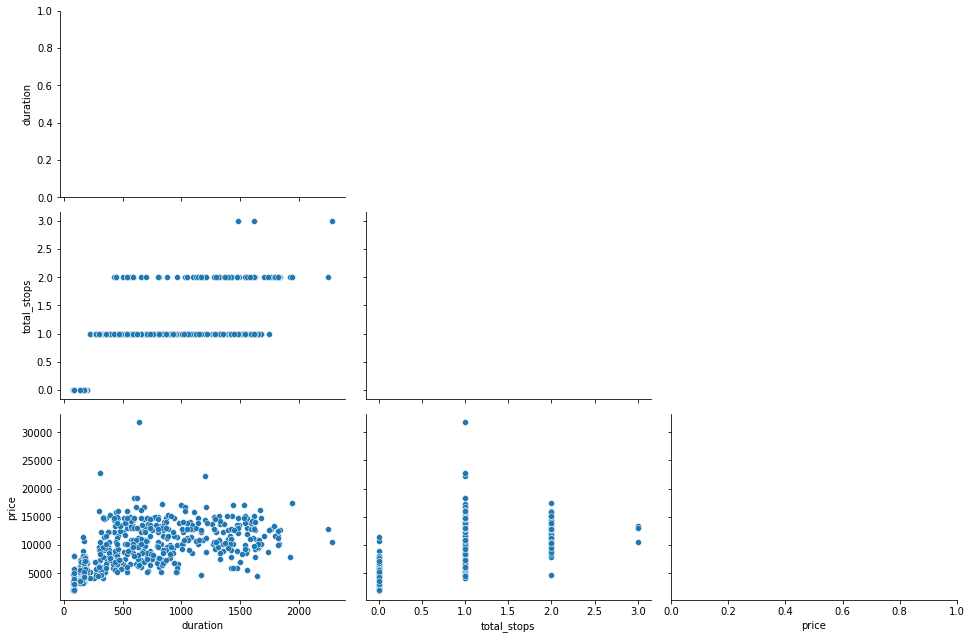

In [13]:
eda_helper_functions.pair_plots(train)

### 7. Correlation Analysis

C:\Python 3.10\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


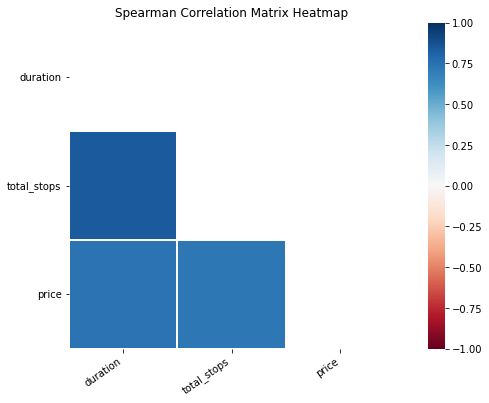

In [14]:
eda_helper_functions.correlation_heatmap(train)

C:\Python 3.10\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


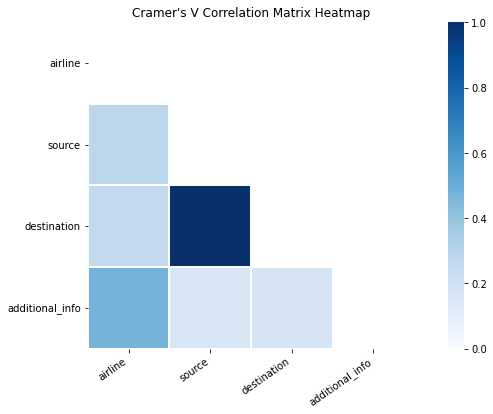

In [15]:
eda_helper_functions.cramersV_heatmap(train)

### 3. Detailed Analysis

In [16]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

#### 8.1. airline

In [17]:
train.airline

0                 Indigo
1            Jet Airways
2            Jet Airways
3      Multiple Carriers
4              Air India
             ...        
635    Multiple Carriers
636               Indigo
637             Air Asia
638    Multiple Carriers
639             Spicejet
Name: airline, Length: 640, dtype: object

In [18]:
eda_helper_functions.cat_summary(data=train,var="airline")

0                 Indigo
1            Jet Airways
2            Jet Airways
3      Multiple Carriers
4              Air India
             ...        
635    Multiple Carriers
636               Indigo
637             Air Asia
638    Multiple Carriers
639             Spicejet
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,238


,count,percentage
category,,
Jet Airways,238,0.371875
Indigo,126,0.196875
Air India,89,0.139063
Multiple Carriers,67,0.104688
Spicejet,54,0.084375
Air Asia,27,0.042188
Vistara,26,0.040625
Goair,13,0.020313


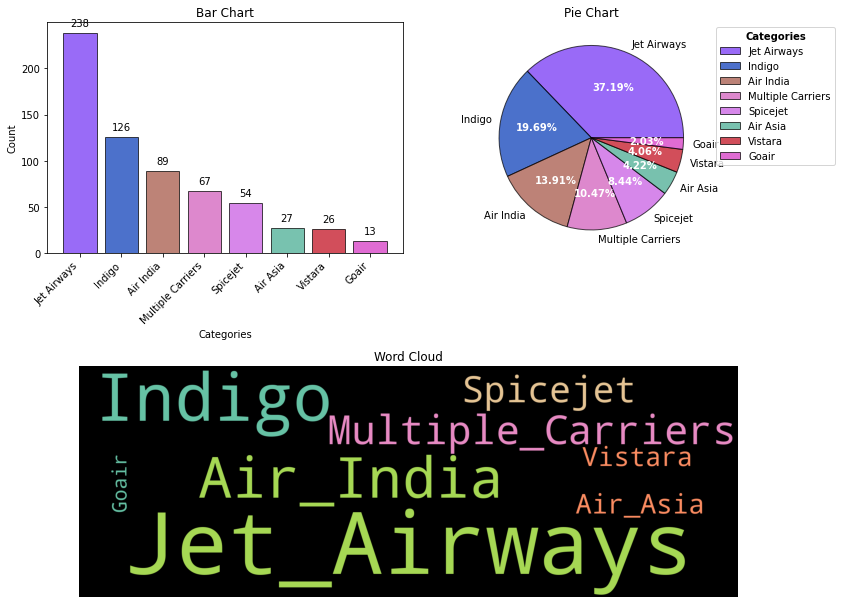

In [19]:
eda_helper_functions.cat_univar_plots(train,"airline")

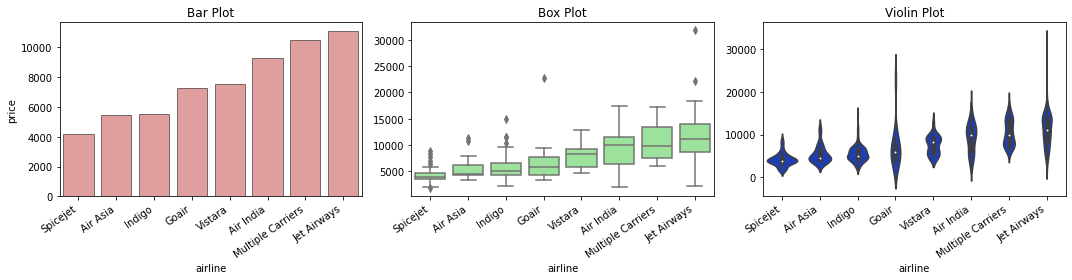

In [20]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var='price',
    cat_var='airline'
)

In [21]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 63.75410957834919
- p-value              : 2.9124786126016285e-69
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 299.8168909933442
- p-value              : 6.61961634096955e-61
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


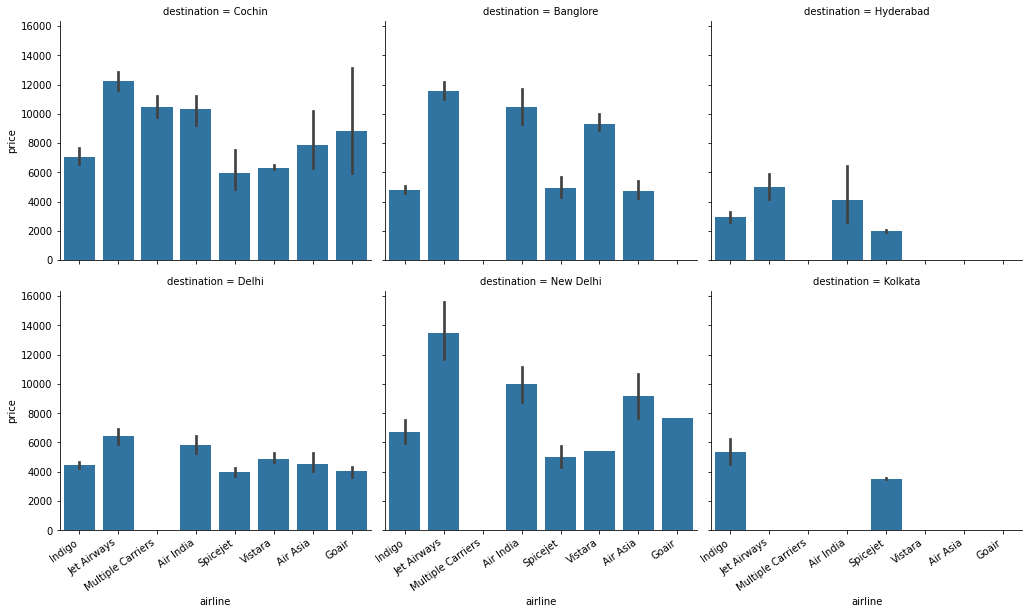

In [22]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

#### 8.2 date_of_journey

In [23]:
train.date_of_journey

0     2019-05-21
1     2019-05-21
2     2019-05-01
3     2019-03-27
4     2019-03-18
         ...    
635   2019-06-01
636   2019-06-12
637   2019-06-21
638   2019-06-06
639   2019-05-18
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

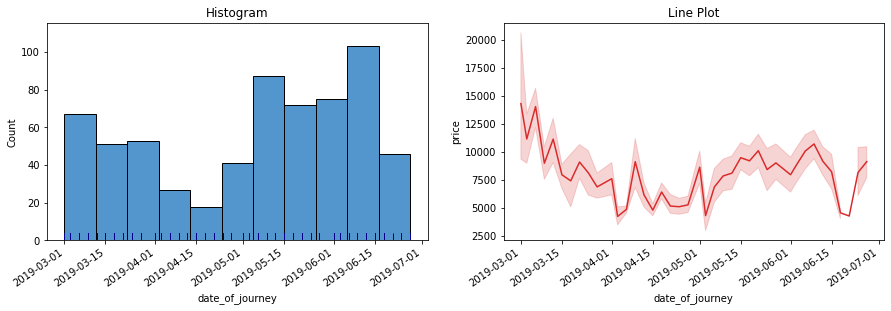

In [24]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

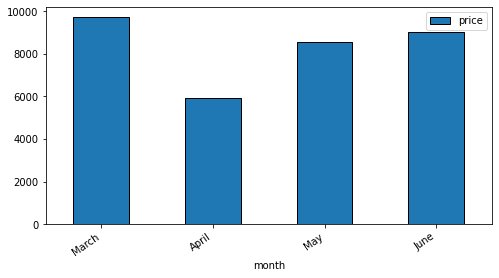

In [25]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

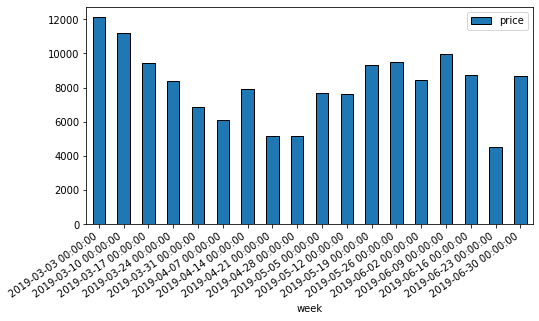

In [26]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

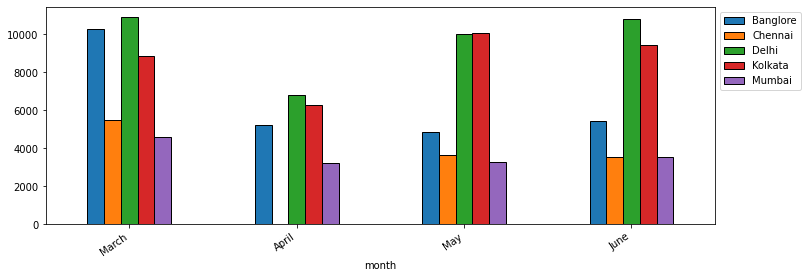

In [27]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12, 4),
        edgecolor="black"
    )
)

ax = plt.gca()

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

#### 8.3 dep_time

In [28]:
train.dep_time

0     2024-06-30 05:35:00
1     2024-06-30 14:05:00
2     2024-06-30 18:55:00
3     2024-06-30 08:55:00
4     2024-06-30 05:10:00
              ...        
635   2024-06-30 07:05:00
636   2024-06-30 16:00:00
637   2024-06-30 04:55:00
638   2024-06-30 11:25:00
639   2024-06-30 17:45:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

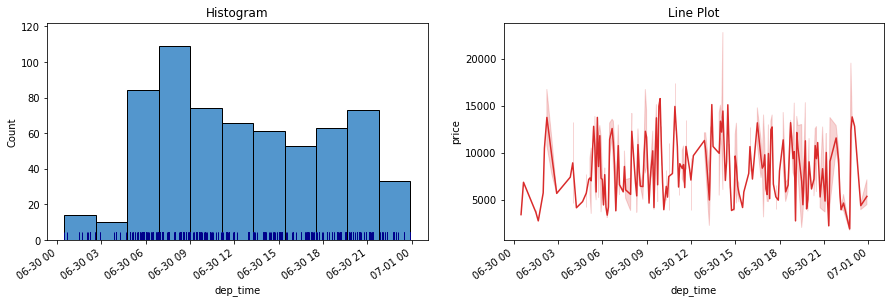

In [29]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

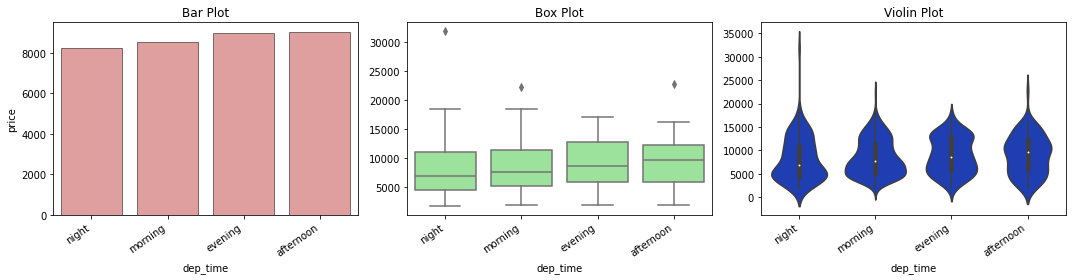

In [30]:
(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
                   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
                  ["morning", "afternoon", "evening"],
                  default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

#### 8.4 duration

In [31]:
train.duration

0      195
1      510
2      585
3      395
4      170
      ... 
635    730
636    300
637    170
638    470
639    140
Name: duration, Length: 640, dtype: int64

In [32]:
eda_helper_functions.num_summary(train, "duration")

0      195
1      510
2      585
3      395
4      170
      ... 
635    730
636    300
637    170
638    470
639    140
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,480.00
75,916.25
90,1470.00
95,1620.00
99,1820.00


,value
mean,625.812500
trimmed mean (5%),592.864583
trimmed mean (10%),562.744141
median,480.000000


,value
var,254017.883412
std,504.001868
IQR,746.250000
mad,315.000000
coef_variance,0.805356


,value
skewness,0.869734
kurtosis,-0.306852


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 5.4930835979143755e-22
Test Statistic       : 0.8781051635742188
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 26.55224949413423
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [33]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.00
0.50    480.00
0.75    916.25
Name: duration, dtype: float64

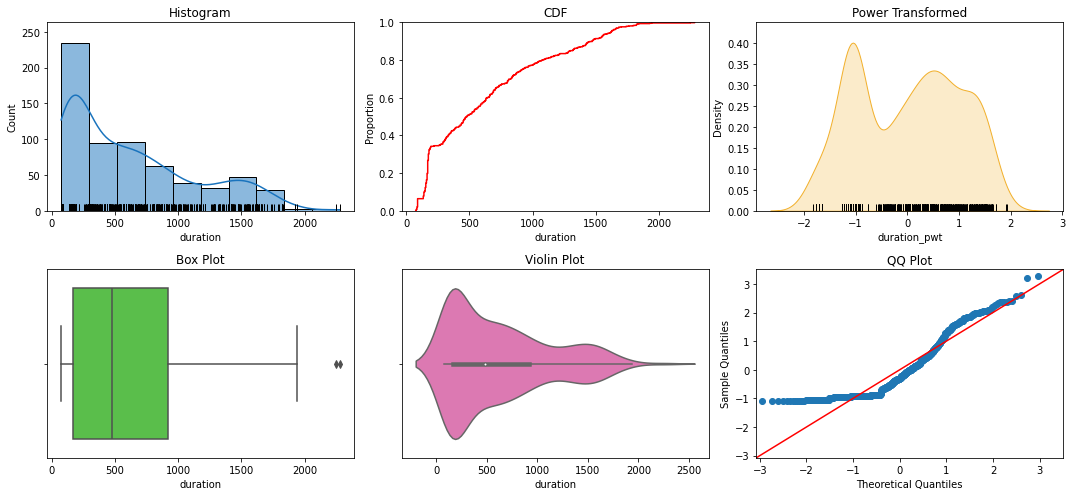

In [34]:
eda_helper_functions.num_univar_plots(train, "duration")

In [37]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6000443478555848
- p-value              : 7.583491813701036e-64
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7410459209328621
- p-value              : 1.8428096392614437e-112
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


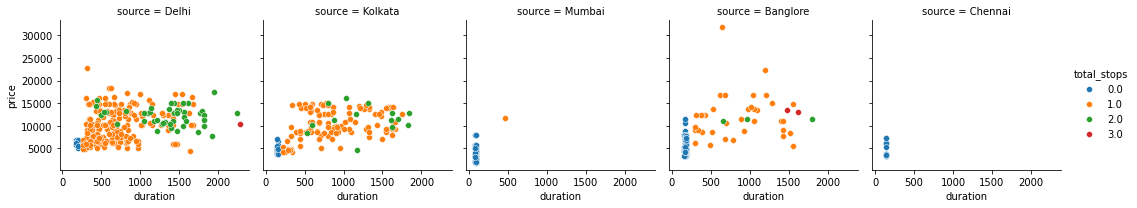

In [38]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

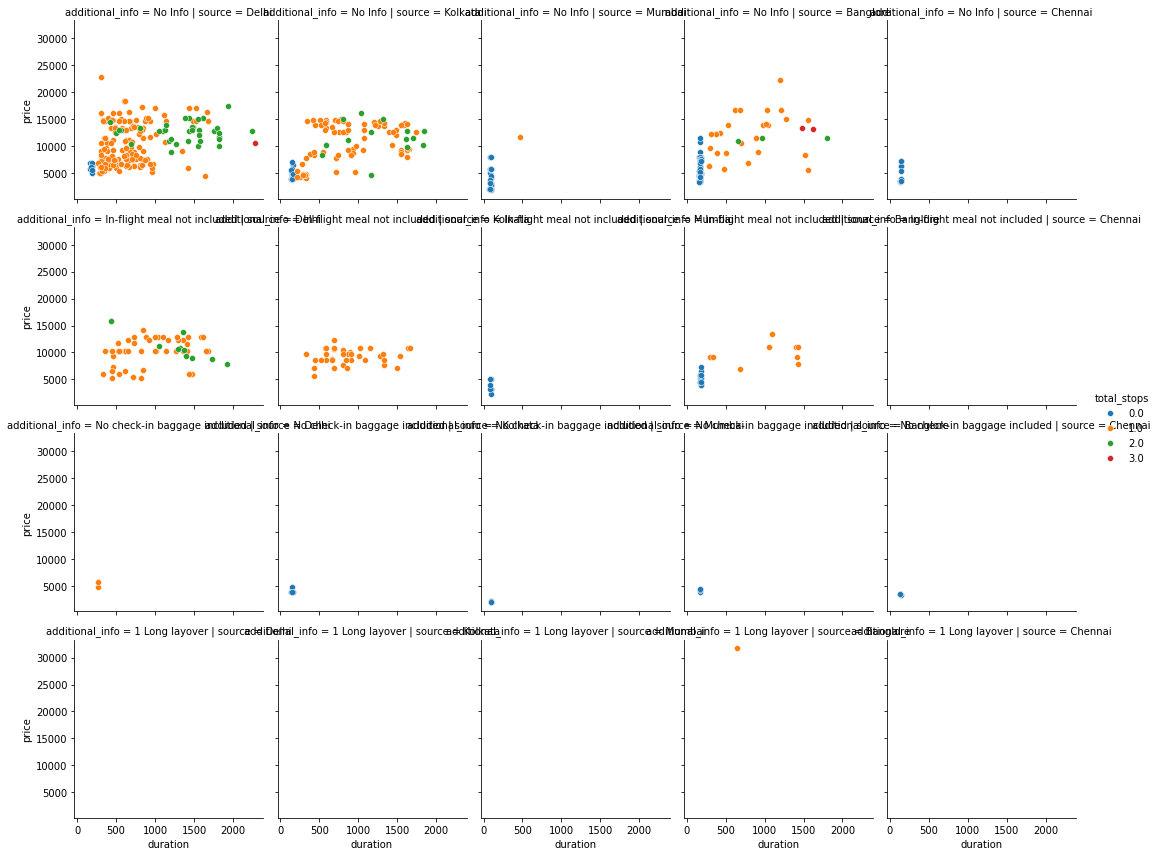

In [39]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    row="additional_info",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [40]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -949.375
Upper Limit : 2035.625


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
630,Jet Airways,2019-03-21,Delhi,Cochin,2024-06-30 05:25:00,2024-06-30 18:50:00,2245,2.0,No Info,12814
209,Air India,2019-06-24,Delhi,Cochin,2024-06-30 05:15:00,2024-06-30 19:15:00,2280,3.0,No Info,10493


#### 8.5 additional_info

In [41]:
eda_helper_functions.cat_summary(train, "additional_info")

0                          No Info
1                          No Info
2      In-flight meal not included
3                          No Info
4                          No Info
                  ...             
635    In-flight meal not included
636                        No Info
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,492


,count,percentage
category,,
No Info,492,0.768750
In-flight meal not included,126,0.196875
No check-in baggage included,21,0.032813
1 Long layover,1,0.001563


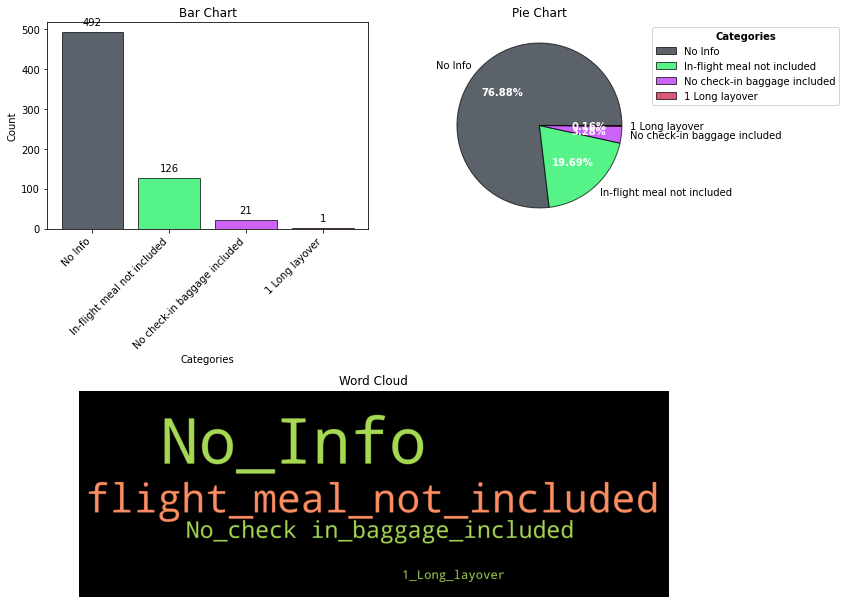

In [42]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

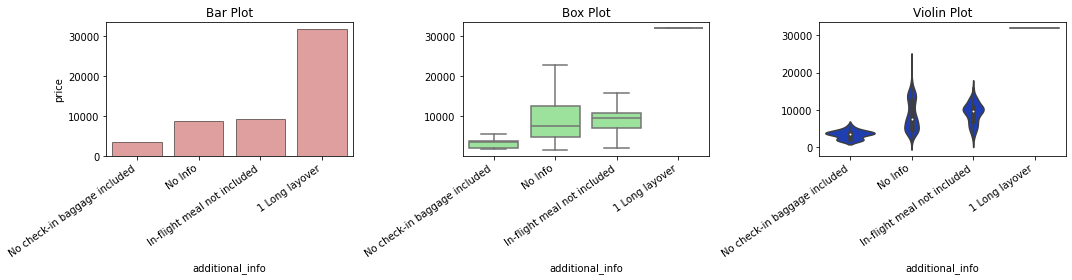

In [43]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

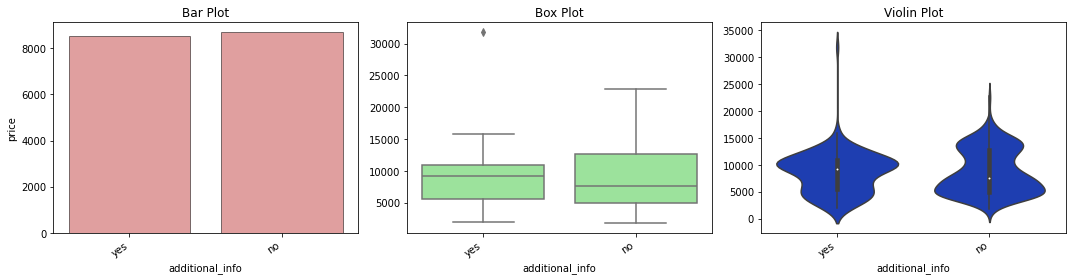

In [45]:
# convertion additional_info into a binary feature for analysis

(
    train
    .assign(additional_info=(
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- additional_info has severely rare categories
- Converted it into a binary feature for further analysis